In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split as split

In [ ]:
#Load the dataset
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
#Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
# Check statistical summary
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


Part 1: Data Cleaning

In [ ]:
#Check for duplicates
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [ ]:
#print the column name and the datatype of 'Density' columns
for col in df.columns:
    if 'Density' in col:
        print(f"Column Name: {col}, Data Type: {df[col].dtype}")

# Rename unusable column name and converting 'Density' columns to float datatype
df = df.rename(columns={col: 'Density' for col in df.columns if 'Density' in col})
df['Density'] = df['Density'].astype(str).str.replace(',', '').astype(float)

Column Name: Density\n(P/Km2), Data Type: object


In [ ]:
#Check for missing values
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [ ]:
# Remove rows with too many missing values
df = df.drop(columns = ['Financial flows to developing countries (US $)'])
df = df.drop(columns = ['Renewables (% equivalent primary energy)'])
df = df.drop(columns = ['Renewable-electricity-generating-capacity-per-capita'])

# drop rows where critical columns are missing
df = df.dropna(subset=['Latitude', 'Longitude', 'Land Area(Km2)', 'Density'])

# Impute missing values for specific columns
columns_to_fill = [
    'Access to clean fuels for cooking', 
    'Renewable energy share in the total final energy consumption (%)', 
    'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
    'Value_co2_emissions_kt_by_country', 'gdp_growth','gdp_per_capita',
    'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 
    'Low-carbon electricity (% electricity)', 'Access to electricity (% of population)'
]

# Impute missing values by Entity mean, fallback to global mean
for col in columns_to_fill:
    # impute Entity mean
    df[col] = df.groupby('Entity')[col].transform(lambda x: x.fillna(x.mean()))
    
    # if any NaNs remain, impute with global mean
    global_mean = df[col].mean()
    df[col] = df[col].fillna(global_mean)

In [93]:
# encode categorical variables (entity)
label_encoder = LabelEncoder()
df['Entity_encoded'] = label_encoder.fit_transform(df['Entity'])

In [94]:
# Define features and target variable
X = df.drop(columns = ['Primary energy consumption per capita (kWh/person)','Entity'])
y = df['Primary energy consumption per capita (kWh/person)']


--- Model-based Selection ---
1. Access to clean fuels for cooking
2. Renewable energy share in the total final energy consumption (%)
3. Energy intensity level of primary energy (MJ/$2017 PPP GDP)
4. gdp_per_capita
5. Density
6. Land Area(Km2)
7. Latitude
8. Longitude
9. Entity_encoded


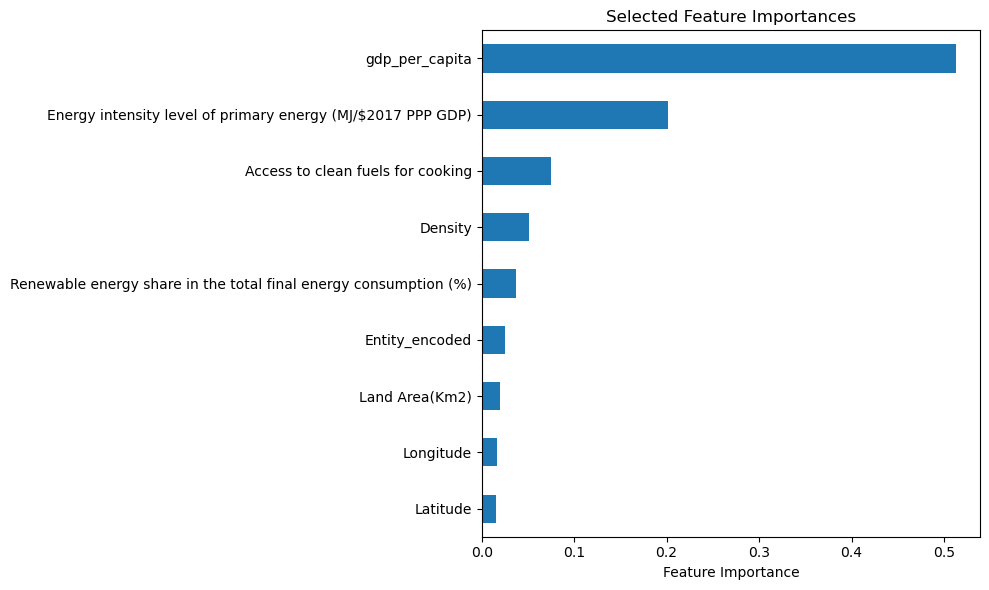

In [ ]:
#feature selection using model-based approach
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold='median')
features = selector.fit_transform(X, y)
selected = selector.get_support()

selected_features = X.columns[selected].tolist()

#print selected features with numbering
print("\n--- Model-based Selection ---")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")
    
X_selected = X[selected_features]

#visualize selected features using bar plot
feature_importances = selector.estimator_.feature_importances_[selected]
feature_importances = pd.Series(feature_importances, index=selected_features).sort_values()
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Selected Feature Importances')
plt.tight_layout()
plt.show()

*Part 2: Model Training*  

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test= split(X_selected, y, test_size= 0.2, random_state=42)

#print shape of training and testing sets
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (2918, 9), y_train shape: (2918,)


In [ ]:
# Model definition
results= []
models={}
models['lnr'] =LinearRegression()
models['knn'] =KNeighborsRegressor()
models['rfr'] =RandomForestRegressor()
models['mpr'] =MLPRegressor()
models['gbr'] =GradientBoostingRegressor()
models['dtr'] =DecisionTreeRegressor()
models['rrn'] =Ridge()
models['svr'] =SVR()

In [ ]:
# K-Fold Cross-Validation setup
kf= KFold(n_splits=5, shuffle= True, random_state=42)

In [ ]:
#define a list
result_cp= []

# Train and evaluate models before scaling
for n in models:
    scores= cross_val_score(models[n], X_train, y_train, cv=kf, n_jobs=-1)
    print(f'model: {n} {scores.mean():.3f} +/- {scores.std():.3f}')

    result_cp.append({
        'Model': n,
        'R2 Mean': scores.mean()
    })

model: lnr 0.648 +/- 0.033
model: knn 0.879 +/- 0.032
model: rfr 0.979 +/- 0.006
model: mpr 0.574 +/- 0.027
model: gbr 0.963 +/- 0.005
model: dtr 0.976 +/- 0.005
model: rrn 0.648 +/- 0.033
model: svr -0.129 +/- 0.020


In [100]:
# print result in dataframe
cp_df= pd.DataFrame(result_cp)
cp_df

,Model,R2 Mean
0,lnr,0.648159
1,knn,0.879008
2,rfr,0.978768
3,mpr,0.574215
4,gbr,0.962822
5,dtr,0.976354
6,rrn,0.648159
7,svr,-0.129421


In [ ]:
#Feature Scaling definition
scalers ={}
scalers['mms']= MinMaxScaler()
scalers['std']= StandardScaler()
scalers['rbs']= RobustScaler()

In [102]:
#finding the best scaler
results= []

#for loop scaler
for s in scalers:
    X_train_scaled= scalers[s].fit_transform(X_train)
    print(f'---- With {s} scaling: ----\n')
    
    #Doing cross-validation by using scaled data
    for n in models:
        scores= cross_val_score(models[n], X_train_scaled, y_train ,cv= kf, n_jobs=-1)
        print(f'Models: {n}: {scores.mean():.3f} +/- {scores.std():.3f}')
        results.append({
            'Scaler': s, 
            'Model': n, 
            'R2 Mean':scores.mean()
            })

---- With mms scaling: ----

Models: lnr: 0.648 +/- 0.033
Models: knn: 0.981 +/- 0.005
Models: rfr: 0.979 +/- 0.006
Models: mpr: -0.421 +/- 0.037
Models: gbr: 0.962 +/- 0.005
Models: dtr: 0.976 +/- 0.005
Models: rrn: 0.648 +/- 0.032
Models: svr: -0.126 +/- 0.020
---- With std scaling: ----

Models: lnr: 0.648 +/- 0.033
Models: knn: 0.978 +/- 0.005
Models: rfr: 0.980 +/- 0.006
Models: mpr: -0.353 +/- 0.031
Models: gbr: 0.963 +/- 0.005
Models: dtr: 0.979 +/- 0.005
Models: rrn: 0.648 +/- 0.033
Models: svr: -0.126 +/- 0.020
---- With rbs scaling: ----

Models: lnr: 0.648 +/- 0.033
Models: knn: 0.971 +/- 0.008
Models: rfr: 0.980 +/- 0.006
Models: mpr: -0.252 +/- 0.030
Models: gbr: 0.963 +/- 0.005
Models: dtr: 0.977 +/- 0.004
Models: rrn: 0.648 +/- 0.033
Models: svr: -0.125 +/- 0.019


In [103]:
#Rearrange the result from high to low
result_df= pd.DataFrame(results)

result_sort= result_df.sort_values(by='R2 Mean', ascending= False)
print(result_sort)

   Scaler Model   R2 Mean
1     mms   knn  0.981497
18    rbs   rfr  0.980195
10    std   rfr  0.979952
2     mms   rfr  0.978707
13    std   dtr  0.978625
9     std   knn  0.977879
21    rbs   dtr  0.976664
5     mms   dtr  0.975995
17    rbs   knn  0.970749
12    std   gbr  0.962777
20    rbs   gbr  0.962613
4     mms   gbr  0.962441
14    std   rrn  0.648165
22    rbs   rrn  0.648160
0     mms   lnr  0.648159
8     std   lnr  0.648159
16    rbs   lnr  0.648159
6     mms   rrn  0.647986
23    rbs   svr -0.125030
7     mms   svr -0.125605
15    std   svr -0.126113
19    rbs   mpr -0.252236
11    std   mpr -0.353324
3     mms   mpr -0.420810


In [104]:
#MinMaxScaler choose as the scaler
scl1= MinMaxScaler()
Xs_train= scl1.fit_transform(X_train)
Xs_test= scl1.transform(X_test)

In [ ]:
# 
tscores= cross_val_score(KNeighborsRegressor(), Xs_train, y_train ,cv= kf, n_jobs=-1)
print(f'{tscores.mean():.3f}')

0.981


KNN Performance Before Tuning

R2 Score: 0.972
RMSE: 5894.821


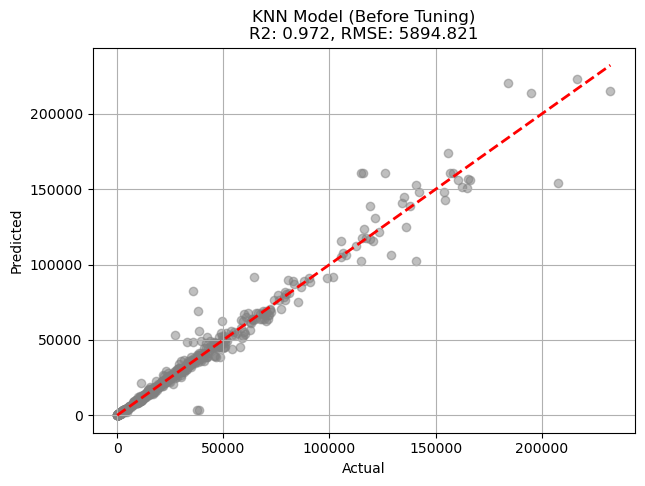

In [106]:
#Using the result from scaler
#redo again the model training
#check the performance
knn_bt =KNeighborsRegressor()
knn_bt.fit(Xs_train, y_train)

y_predb= knn_bt.predict(Xs_test)

r2b= r2_score(y_test, y_predb)
rmseb= np.sqrt(mean_squared_error(y_test, y_predb))

print(f"KNN Performance Before Tuning\n")
print(f"R2 Score: {r2b:.3f}")
print(f"RMSE: {rmseb:.3f}")


plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_predb, color='gray', alpha=0.5) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'KNN Model (Before Tuning)\nR2: {r2b:.3f}, RMSE: {rmseb:.3f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

In [107]:
#hyperparameter tuning using for loop
#by changing the range in k and type of weight
k_range = range(1,22,2)
wght = ['uniform', 'distance']

print(f"{'K Value':<10} | {'Weight Type':<15} | {'R2 Score (Test)':<15}")
print("-" * 45)

results_hp = []

for k in k_range:
    for w in wght:
        knn_hp = KNeighborsRegressor(n_neighbors=k, weights=w)
        kscores= cross_val_score(knn_hp, Xs_train, y_train, cv=kf, scoring='r2',n_jobs=-1)

        kmscores= kscores.mean()
        print(f"{k:<10} | {w:<15} | {kmscores:.3f}")
        
        results_hp.append({'K': k, 
                        'Weight': w, 
                        'R2 Score': kmscores})

K Value    | Weight Type     | R2 Score (Test)
---------------------------------------------
1          | uniform         | 0.988
1          | distance        | 0.988
3          | uniform         | 0.987
3          | distance        | 0.990
5          | uniform         | 0.981
5          | distance        | 0.988
7          | uniform         | 0.976
7          | distance        | 0.986
9          | uniform         | 0.967
9          | distance        | 0.983
11         | uniform         | 0.959
11         | distance        | 0.980
13         | uniform         | 0.948
13         | distance        | 0.978
15         | uniform         | 0.933
15         | distance        | 0.977
17         | uniform         | 0.914
17         | distance        | 0.974
19         | uniform         | 0.895
19         | distance        | 0.972
21         | uniform         | 0.877
21         | distance        | 0.970


In [ ]:
#display the result in dataframe
resulthp= pd.DataFrame(results_hp)
resulthp_sort= resulthp.sort_values(by='R2 Score', ascending= False)
print(resulthp_sort.head())

   K    Weight  R2 Score
3  3  distance  0.989538
5  5  distance  0.987904
1  1  distance  0.987798
0  1   uniform  0.987798
2  3   uniform  0.986693


Tuning KNeighbors
Fitting 5 folds for each of 44 candidates, totalling 220 fits

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Final R2 Score: 0.978
Final RMSE: 5178.850


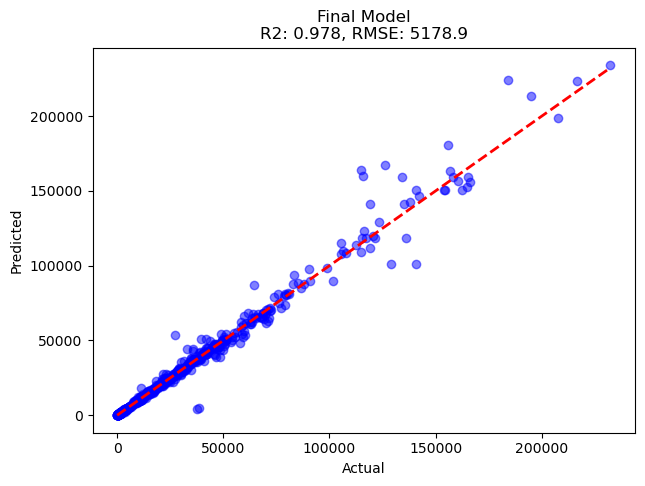

In [109]:
#hyperparameter tuning using GridSearchCV
knn_pg= { 'n_neighbors': list(range(1,22,2)),
         'weights': ['uniform','distance'],
         'metric': ['euclidean','manhattan']
}
grid_knn_pghp= GridSearchCV(estimator=KNeighborsRegressor(),
                          param_grid=knn_pg, 
                          cv=kf, scoring='r2',n_jobs=-1, verbose=1)
print("Tuning KNeighbors")
grid_knn_pghp.fit(Xs_train, y_train)

best_knn= grid_knn_pghp.best_estimator_
y_pred= best_knn.predict(Xs_test)

fr2= r2_score(y_test, y_pred)
frmse= np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nBest Parameters: {grid_knn_pghp.best_params_}")
print(f"Final R2 Score: {fr2:.3f}")
print(f"Final RMSE: {frmse:.3f}")

#draw graph
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Final Model\nR2: {fr2:.3f}, RMSE: {frmse:.1f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
#final model evaluation
y_pred= grid_knn_pghp.predict(Xs_test)
fscores= grid_knn_pghp.score(Xs_test, y_test)
fmae= mean_absolute_error(y_test, y_pred)
frmse= np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Final Test RMSE: {frmse:.3f}')
print(f'Final MAE: {fmae:.3f}')
print(f'R2: {fscores:.3f} ')

Final Test RMSE: 5178.850
Final MAE: 1741.516
R2: 0.978 
